Ingrese Numero de Puntos a Evaluar: 3
Ingrese el x para hallar el logaritmo: 8
Ingrese el X0: 2
Ingrese el X1: 8
Ingrese el X2: 12
El valor real es de Ln(8) es 2.07944154
El valor aproximado para el Ln(8) es 2.07944154
El coeficiente b0 es 0.69314718
El coeficiente b1 es 0.23104906
El coeficiente b2 es -0.01296828


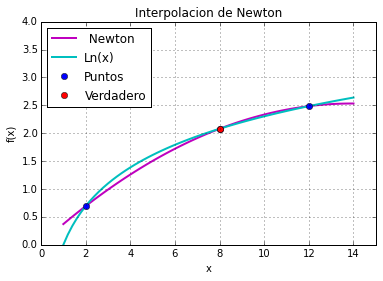

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

coefB,equis,ye,new,xi,yi=[],[],[],[],[],[]
n = int(raw_input("Ingrese Numero de Puntos a Evaluar: "))
x= float(raw_input("Ingrese el x para hallar el logaritmo: "))

for i in range(n):
    xi.append(float(raw_input("Ingrese el X%d: "%(i))))

def funcion(num):
    value=math.log(num)
    return value 

def coeficientes(vector):
    while(len(coefB)<len(vector)):
        if(len(coefB)==0):
            coefB.append(funcion(vector[0]))
        else:
            coefB.append(metodo(vector[0:len(coefB)+1]))
    
def metodo(aux):
    r=0
    if(len(aux)==2):
        r=(funcion(aux[1])-funcion(aux[0]))/(aux[1]-aux[0])
    else: 
        r=(metodo(aux[1:len(aux)])-metodo(aux[0:len(aux)-1]))/(aux[len(aux)-1]-aux[0])
    return r

def newton(real):
    fx=0
    for i in range(len(coefB)):
        mult=1
        for o in range(i):
            mult=mult*(real-xi[o])
        fx+=coefB[i]*mult
    return fx

def graficar():
    cont=1
    for i in range(n):
        yi.append(funcion(xi[i]))
    while(cont<=14):
        equis.append(cont)
        ye.append(funcion(cont))
        new.append(newton(cont))
        cont+=0.2
        
coeficientes(xi)
graficar()
print "El valor real es de Ln(%d) es %.8f" %(x,funcion(x))
print "El valor aproximado para el Ln(%d) es %.8f" %(x,newton(x))

for k in range (n):
    print "El coeficiente b%d es %.8f" %(k,coefB[k])

plt.title("Interpolacion de Newton")
plt.axis([0,15,0,4])
plt.grid(True)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.plot(equis,new, 'm-',linewidth=2.0, label=" Newton")
plt.plot(equis,ye, 'c-',linewidth=2.0,label="Ln(x)")
plt.plot(xi,yi, 'bo',linewidth=2.0, label="Puntos")
plt.plot(x,funcion(x), 'ro',linewidth=3.0, label="Verdadero")
plt.legend(loc = 'upper left', numpoints = 1)
plt.show()